In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%config IPCompleter.greedy=True

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# sudo apt-get install graphviz

In [4]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

In [5]:
titanic_data = pd.read_csv('./resources/train.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
x = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [9]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
y = titanic_data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
clf = tree.DecisionTreeClassifier()
clf.fit(x, y)

ValueError: could not convert string to float: 'male'

In [12]:
x = pd.get_dummies(x)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
x = x.fillna({'Age': x['Age'].median()})

In [14]:
x.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

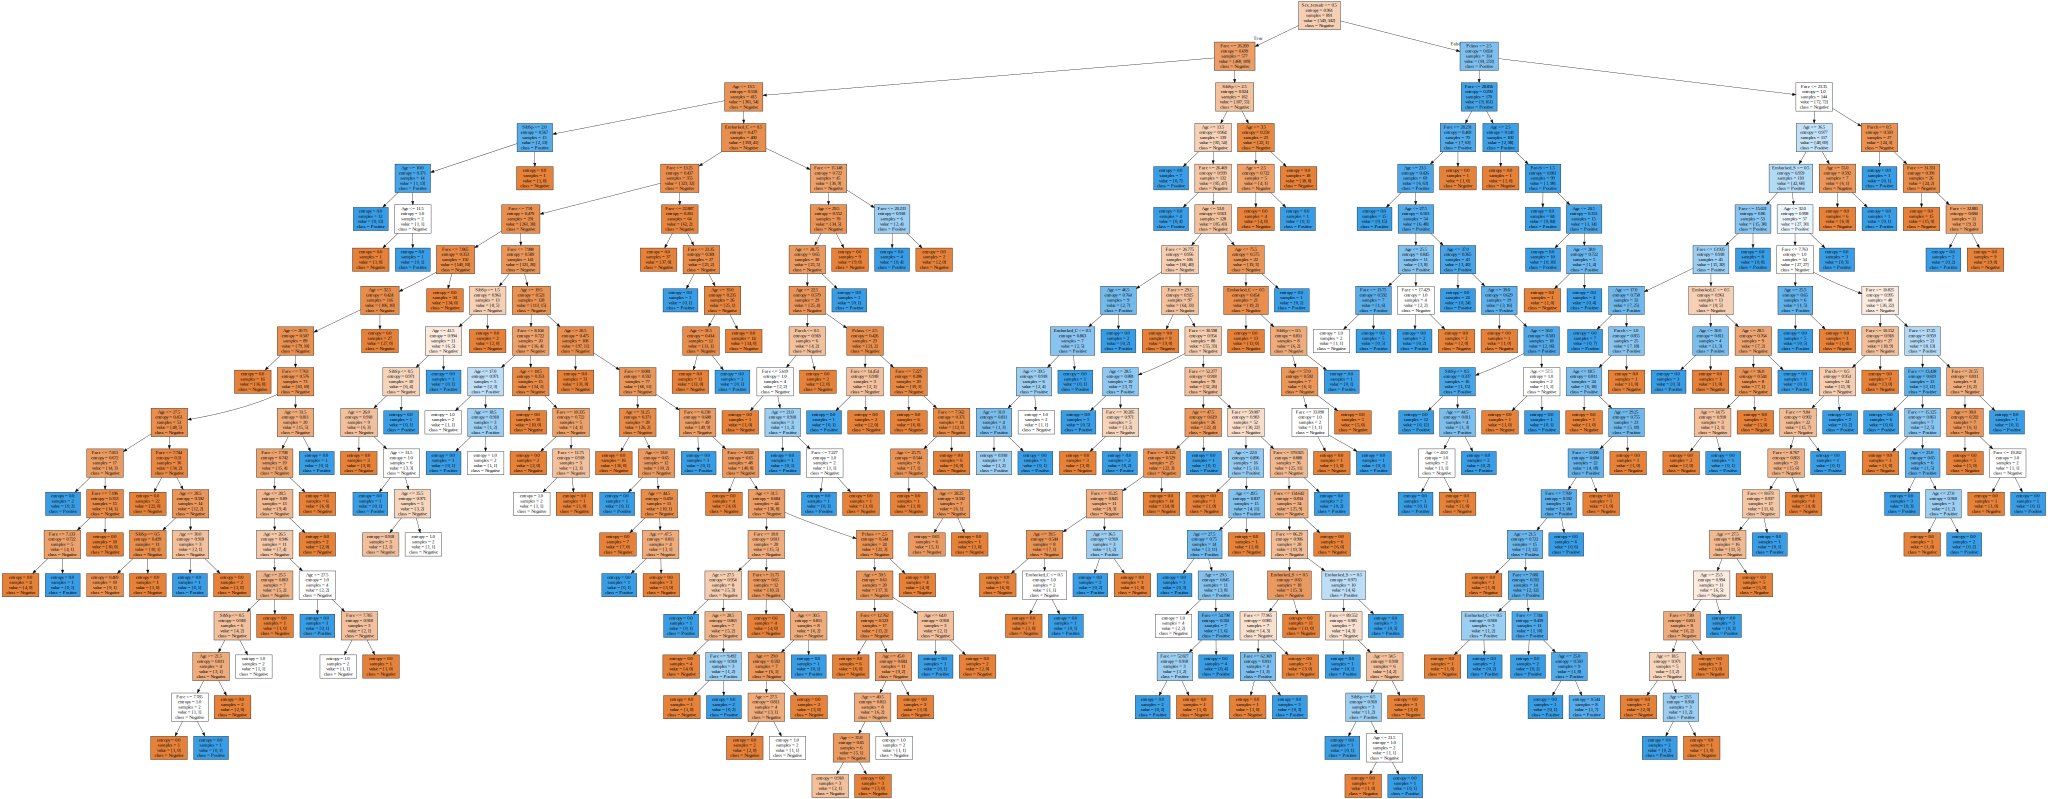

In [16]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(x),
                                   class_names=['Negative','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [20]:
clf.score(x, y)

0.9797979797979798

In [21]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
clf.score(x_train, y_train)

0.9798657718120806

In [23]:
clf.score(x_test, y_test)

0.7694915254237288

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
clf.score(x_train, y_train)

0.8238255033557047

In [27]:
clf.score(x_test, y_test)

0.8203389830508474

In [28]:
max_depth_values = range(1, 100)

In [29]:
scores_data = pd.DataFrame()

In [30]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [31]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [32]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [33]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


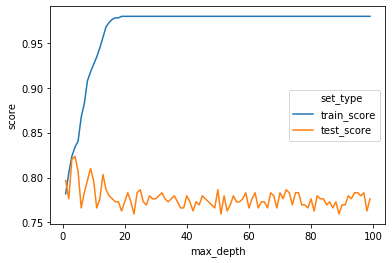

In [34]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
cross_val_score(clf, x_train, y_train , cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [38]:
cross_val_score(clf, x_train, y_train , cv=5).mean()

0.7886274509803922

In [39]:
scores_data = pd.DataFrame()

In [40]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    mean_cross_val_score = cross_val_score(clf, x_train, y_train , cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [41]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.798711


In [42]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [43]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


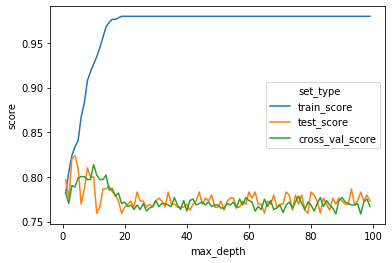

In [44]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [45]:
scores_data_long[scores_data_long['set_type'] == 'cross_val_score'].head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.798711
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.797003
206,9,cross_val_score,0.796989
207,10,cross_val_score,0.813796


In [46]:
scores_data_long[scores_data_long['set_type'] == 'cross_val_score']['score'].max()

0.8137955182072828

In [47]:
id_max = scores_data_long[scores_data_long['set_type'] == 'cross_val_score']['score'].idxmax()
id_max

207

In [48]:
best_depth = scores_data_long.loc[id_max, 'max_depth']
best_depth

10

In [49]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

In [50]:
cross_val_score(best_clf, x_test, y_test , cv=5).mean()

0.7898305084745763

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
parametrs = {"criterion": ["gini", "entropy"], 'max_depth': range(1, 30)}

In [54]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [55]:
grid_search_cv_clf.fit(x_train, y_train);

In [56]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [57]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
best_clf.score(x_test, y_test)

0.7966101694915254

In [59]:
from sklearn.metrics import precision_score, recall_score

In [60]:
y_pred = best_clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [61]:
precision_score(y_test, y_pred)

0.8061224489795918

In [62]:
recall_score(y_test, y_pred)

0.6583333333333333

In [63]:
y_pred_prob = best_clf.predict_proba(x_test)
y_pred_prob

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

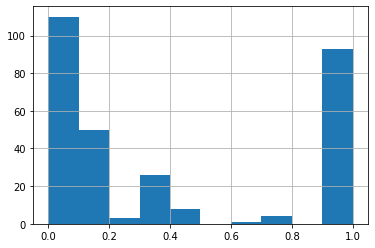

In [64]:
pd.Series(y_pred_prob[:, 1]).hist()

In [65]:
import numpy as np

In [66]:
np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [67]:
y_pred = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

In [68]:
precision_score(y_test, y_pred)

0.8172043010752689

In [69]:
recall_score(y_test, y_pred)

0.6333333333333333

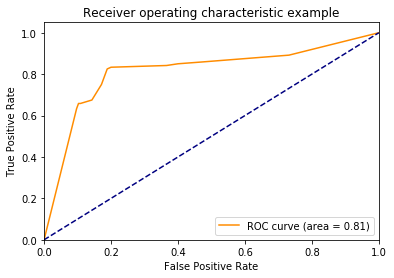

In [70]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [71]:
# Убедимся в том, что всё так происходит на самом деле. Jбучите деревья с глубиной от 1 до 100. 
# Целевой переменной при обучении является переменная species. 
# При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, 
# и аккуратность предсказаний (accuracy_score) на тестовом датасэте. 
# Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева 

# Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)
# np.random.seed(0)
# my_awesome_tree = DecisionTreeClassifier(...)
# или
# my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [72]:
iris_data = pd.read_csv('./resources/train_iris.csv', index_col=0)

In [73]:
iris_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [74]:
x_train = iris_data.drop(['species'], axis=1)
x_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [75]:
y_train = iris_data['species']
y_train.head()

130    2
7      0
11     0
142    2
109    2
Name: species, dtype: int64

In [76]:
iris_data = pd.read_csv('./resources/test_iris.csv', index_col=0)

In [77]:
iris_data.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [78]:
x_test = iris_data.drop(['species'], axis=1)
x_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
59,5.2,2.7,3.9,1.4
44,5.1,3.8,1.9,0.4


In [79]:
y_test = iris_data['species']
y_test.head()

114    2
70     1
138    2
59     1
44     0
Name: species, dtype: int64

In [80]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score]
    })
    scores_data = scores_data.append(temp_score_data)

In [81]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score',],
                           var_name='set_type', value_name='score')

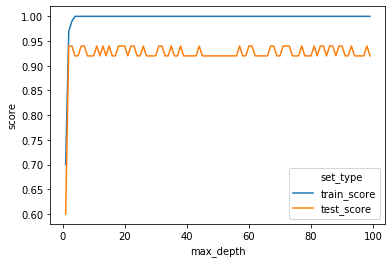

In [82]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [83]:
# Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! 
# Скачайте тренировочный датасэт и  обучите на нём Decision Tree. 
# После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. 
# Введите число собачек в вашем датасэте.

# P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [84]:
data = pd.read_csv('./resources/dogs_n_cats.csv')
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [85]:
x_train = data[['Длина', 'Высота', 'Гавкает', 'Лазает по деревьям']]
x_train.head()

,Длина,Высота,Гавкает,Лазает по деревьям
0,15,18.0,1,0
1,20,24.0,0,0
2,34,40.8,1,0
3,26,31.2,1,0
4,16,19.2,1,0


In [86]:
y_train = data['Вид']
y_train = pd.get_dummies(y_train)['собачка']
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: собачка, dtype: uint8

In [87]:
scores_data = pd.DataFrame()
for max_depth in range(1, 101):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    mean_cross_val_score = cross_val_score(clf, x_train, y_train , cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [88]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


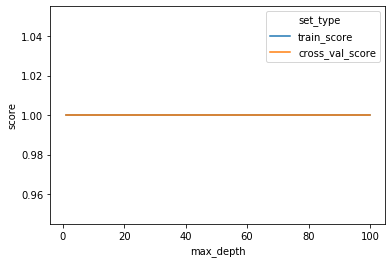

In [89]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [90]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

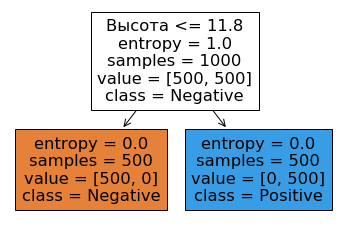

In [91]:
tree.plot_tree(clf, feature_names=list(x_train), class_names=['Negative', 'Positive'], filled=True);

In [92]:
data_test = pd.read_json('./resources/dataset_209691_15.txt').drop(['Шерстист'], axis=1)
data_test.head()

,Длина,Высота,Гавкает,Лазает по деревьям
0,27,32.4,1,0
1,17,20.4,1,0
2,20,24.0,1,0
3,25,30.0,1,0
4,27,32.4,1,0


In [93]:
clf.predict(data_test).sum()

41

In [94]:
# Поупражняемся в расчётах precision. 
# В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. 
# Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными 
# и числовыми переменными, а текст это... текст. 
# Поэтому его необходимо преобразовать в понятную для модели форму. 
# В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

# Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. 
# Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', 
# и сохраните результат в переменную precision.

# Если он будет недостаточно высок, потюньте немного модель.
# Исходные колонки типа жанра, года были выкинуты в задании

In [95]:
songs_data = pd.read_csv('./resources/songs.csv')
songs_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [96]:
x_train = songs_data.drop(['artist', 'genre', 'song', 'lyrics'], axis=1)
x_train.head()

,year,length,commas,exclamations,colons,hyphens
0,2007,1300,24,5,0,11
1,2006,1566,0,0,0,0
2,2006,996,1,0,1,0
3,2015,2868,5,0,0,0
4,2014,3351,22,0,0,3


In [97]:
y_train = songs_data['artist']
y_train.head()

0         gangstarr
1    blind-guardian
2    blind-guardian
3    blind-guardian
4         gangstarr
Name: artist, dtype: object

In [98]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
mean_cross_val_score = cross_val_score(clf, x_train, y_train , cv=5).mean()

In [99]:
mean_cross_val_score

0.7138888888888888

In [100]:
scores_data = pd.DataFrame()
for max_depth in range(1, 101):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    mean_cross_val_score = cross_val_score(clf, x_train, y_train , cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

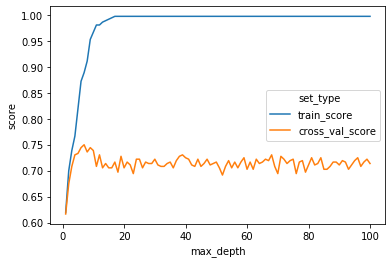

In [101]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [102]:
id_max = scores_data_long[scores_data_long['set_type'] == 'cross_val_score']['score'].idxmax()
best_depth = scores_data_long.loc[id_max, 'max_depth']
best_depth

7

In [103]:
max_score = scores_data_long[scores_data_long['set_type'] == 'cross_val_score']['score'].max()
max_score

0.75

In [104]:
_, x_test, _, y_test =  train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [105]:
from sklearn.metrics import precision_score

In [106]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
precision_score(y_test, predictions, average='micro')

0.8991596638655462